In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel(r"C:\Users\aalme\OneDrive\Desktop\PROJECT\ABC_manufacturing_rc (2).xlsx",header=0)


In [4]:
df.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE_x,DATE,FREQUENCY,VALUE_y,DATE_1,month_full,Year,As Quarter,Fiscal Year
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,ABC Manufacturing,5824.170,01-11-2014,Monthly,0.0,2014-11-01,November,2014,2015Q3,2015
1,2014-2015,Nov,Haryana,Herbicides,Rohtak,ABC Manufacturing,226.935,01-11-2014,Monthly,0.0,2014-11-01,November,2014,2015Q3,2015
2,2014-2015,Nov,Haryana,Rodenticides,Rohtak,ABC Manufacturing,1241.460,01-11-2014,Monthly,0.0,2014-11-01,November,2014,2015Q3,2015
3,2014-2015,Nov,Haryana,Bactericides,Rohtak,ABC Manufacturing,0.000,01-11-2014,Monthly,0.0,2014-11-01,November,2014,2015Q3,2015
4,2014-2015,Nov,Haryana,Insecticides,Rewari,ABC Manufacturing,6637.410,01-11-2014,Monthly,0.0,2014-11-01,November,2014,2015Q3,2015


In [5]:
df.dtypes

FIN_YEAR               object
MONTH                  object
STATE                  object
FG                     object
DISTRICT               object
COMPANY                object
VALUE_x               float64
DATE                   object
FREQUENCY              object
VALUE_y               float64
DATE_1         datetime64[ns]
month_full             object
Year                    int64
As Quarter             object
Fiscal Year             int64
dtype: object

In [6]:
df["STATE"].value_counts()

Uttar Pradesh       11440
Haryana              6028
Himachal Pradesh     3340
Punjab               2924
Uttarakhand          1528
Name: STATE, dtype: int64

In [7]:
df["COMPANY"].value_counts()

ABC Manufacturing    25260
Name: COMPANY, dtype: int64

In [8]:
company_state =  df[df['STATE']=='Haryana']

In [7]:
#company_fg = company_state[company_state['FG']=='Insecticides']

In [9]:
company_state.shape

(6028, 15)

In [10]:
company_state.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE_x,DATE,FREQUENCY,VALUE_y,DATE_1,month_full,Year,As Quarter,Fiscal Year
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,ABC Manufacturing,5824.170,01-11-2014,Monthly,0.0,2014-11-01,November,2014,2015Q3,2015
1,2014-2015,Nov,Haryana,Herbicides,Rohtak,ABC Manufacturing,226.935,01-11-2014,Monthly,0.0,2014-11-01,November,2014,2015Q3,2015
2,2014-2015,Nov,Haryana,Rodenticides,Rohtak,ABC Manufacturing,1241.460,01-11-2014,Monthly,0.0,2014-11-01,November,2014,2015Q3,2015
3,2014-2015,Nov,Haryana,Bactericides,Rohtak,ABC Manufacturing,0.000,01-11-2014,Monthly,0.0,2014-11-01,November,2014,2015Q3,2015
4,2014-2015,Nov,Haryana,Insecticides,Rewari,ABC Manufacturing,6637.410,01-11-2014,Monthly,0.0,2014-11-01,November,2014,2015Q3,2015


In [11]:
company_state =company_state[['DATE_1','VALUE_x']]

In [12]:
company_state.shape

(6028, 2)

In [13]:
company_state['DATE_1'].min(), company_state['DATE_1'].max()

(Timestamp('2014-05-01 00:00:00'), Timestamp('2018-04-01 00:00:00'))

In [14]:
company = company_state.sort_values('DATE_1', ascending=True)
company.isnull().sum()

DATE_1     0
VALUE_x    0
dtype: int64

In [15]:
company.head(10)

,DATE_1,VALUE_x
664,2014-05-01,252.720
674,2014-05-01,272.970
675,2014-05-01,0.000
676,2014-05-01,3436.830
677,2014-05-01,213.165
678,2014-05-01,1921.995
679,2014-05-01,0.000
673,2014-05-01,96.795
680,2014-05-01,472.770
682,2014-05-01,130.410


In [16]:
company["DATE_1"].value_counts()

2016-12-01    328
2016-10-01    328
2016-11-01    316
2016-09-01    300
2016-08-01    284
2016-06-01    280
2017-01-01    276
2016-07-01    272
2017-03-01    256
2017-02-01    240
2016-05-01    212
2017-04-01    168
2015-10-01     84
2014-06-01     84
2016-03-01     84
2015-12-01     84
2015-11-01     84
2016-04-01     84
2015-08-01     84
2017-05-01     84
2015-05-01     84
2015-04-01     84
2017-07-01     84
2015-02-01     84
2017-08-01     84
2017-10-01     84
2017-11-01     84
2014-10-01     84
2014-09-01     84
2017-12-01     84
2018-01-01     84
2015-09-01     84
2018-04-01     80
2016-02-01     80
2015-07-01     80
2015-06-01     80
2015-01-01     80
2014-12-01     80
2014-11-01     80
2014-08-01     80
2017-06-01     76
2017-09-01     76
2014-07-01     76
2014-05-01     76
2016-01-01     72
2015-03-01     72
Name: DATE_1, dtype: int64

In [17]:
company = company.groupby('DATE_1')["VALUE_x"].sum().reset_index()
company.shape

(46, 2)

In [18]:
company.head(10)

,DATE_1,VALUE_x
0,2014-05-01,47482.740
1,2014-06-01,130684.185
2,2014-07-01,75471.075
3,2014-08-01,107146.530
4,2014-09-01,138232.710
5,2014-10-01,168045.030
6,2014-11-01,175710.870
7,2014-12-01,127656.945
8,2015-01-01,128078.820
9,2015-02-01,107427.060


In [19]:
company = company.set_index("DATE_1")

In [20]:
company.head(10)

,VALUE_x
DATE_1,
2014-05-01,47482.740
2014-06-01,130684.185
2014-07-01,75471.075
2014-08-01,107146.530
2014-09-01,138232.710
2014-10-01,168045.030
2014-11-01,175710.870
2014-12-01,127656.945
2015-01-01,128078.820


In [21]:
y = company['VALUE_x'].resample('M').sum()

In [22]:
print(y.shape)

(48,)


In [23]:
y

DATE_1
2014-05-31     47482.740
2014-06-30    130684.185
2014-07-31     75471.075
2014-08-31    107146.530
2014-09-30    138232.710
2014-10-31    168045.030
2014-11-30    175710.870
2014-12-31    127656.945
2015-01-31    128078.820
2015-02-28    107427.060
2015-03-31    110342.925
2015-04-30     32577.660
2015-05-31    149968.395
2015-06-30    160265.790
2015-07-31    132693.660
2015-08-31    129301.785
2015-09-30    137774.115
2015-10-31    313321.500
2015-11-30    163620.135
2015-12-31    152072.100
2016-01-31     75341.880
2016-02-29     73139.760
2016-03-31    106902.720
2016-04-30    131720.580
2016-05-31     63360.630
2016-06-30    144712.575
2016-07-31    114598.395
2016-08-31    100687.320
2016-09-30    202416.975
2016-10-31    120286.890
2016-11-30    154636.020
2016-12-31    156926.565
2017-01-31     84634.065
2017-02-28     58354.155
2017-03-31    115689.195
2017-04-30     16131.285
2017-05-31    110724.975
2017-06-30    171017.595
2017-07-31     97934.940
2017-08-31     803

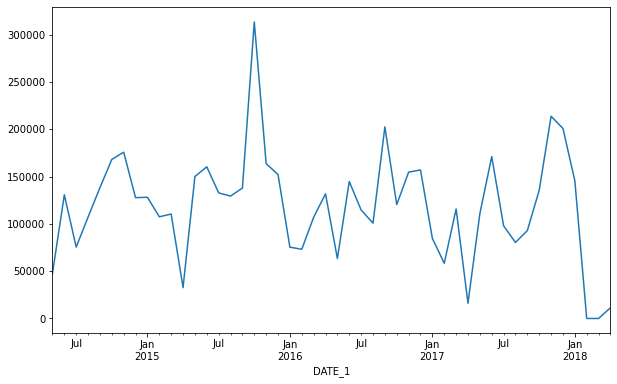

In [24]:
y.plot(figsize=(10,6))
plt.show()

In [25]:
train = y.loc[:'2016-12-31']
print(train.shape)
train

(32,)


DATE_1
2014-05-31     47482.740
2014-06-30    130684.185
2014-07-31     75471.075
2014-08-31    107146.530
2014-09-30    138232.710
2014-10-31    168045.030
2014-11-30    175710.870
2014-12-31    127656.945
2015-01-31    128078.820
2015-02-28    107427.060
2015-03-31    110342.925
2015-04-30     32577.660
2015-05-31    149968.395
2015-06-30    160265.790
2015-07-31    132693.660
2015-08-31    129301.785
2015-09-30    137774.115
2015-10-31    313321.500
2015-11-30    163620.135
2015-12-31    152072.100
2016-01-31     75341.880
2016-02-29     73139.760
2016-03-31    106902.720
2016-04-30    131720.580
2016-05-31     63360.630
2016-06-30    144712.575
2016-07-31    114598.395
2016-08-31    100687.320
2016-09-30    202416.975
2016-10-31    120286.890
2016-11-30    154636.020
2016-12-31    156926.565
Freq: M, Name: VALUE_x, dtype: float64

In [26]:
test = y.loc['2017-01-01':]
print(test.shape)
test

(16,)


DATE_1
2017-01-31     84634.065
2017-02-28     58354.155
2017-03-31    115689.195
2017-04-30     16131.285
2017-05-31    110724.975
2017-06-30    171017.595
2017-07-31     97934.940
2017-08-31     80357.130
2017-09-30     92884.995
2017-10-31    135560.655
2017-11-30    213711.210
2017-12-31    200733.525
2018-01-31    145582.245
2018-02-28         0.000
2018-03-31         0.000
2018-04-30     11309.085
Freq: M, Name: VALUE_x, dtype: float64

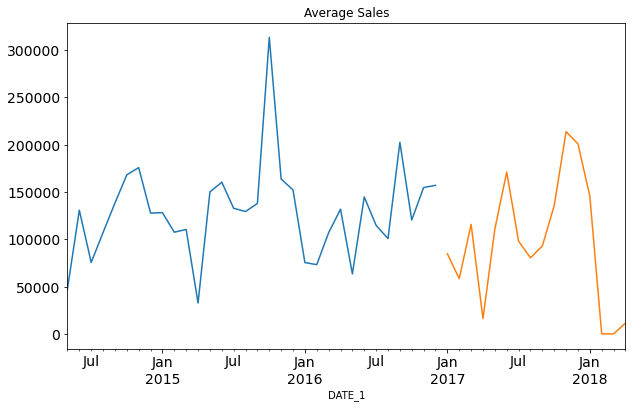

In [27]:
train.plot(figsize=(10,6), title = "Average Sales", fontsize = 14)
test.plot(figsize=(10,6), title = "Average Sales", fontsize = 14)
plt.show()

# Simple exponential smoothing

C:\Users\aalme\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\aalme\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


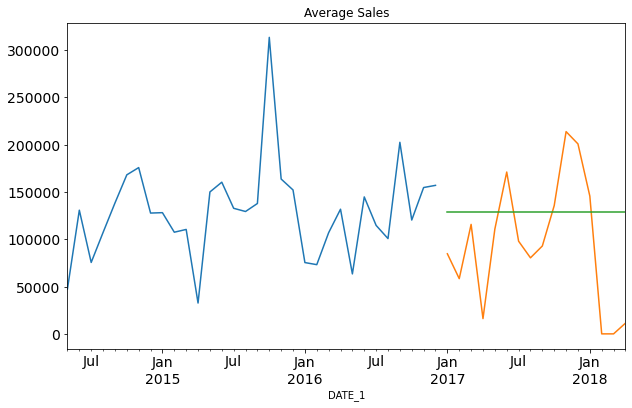

In [28]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [29]:
Exp_Smooth.SES

2017-01-31    129234.784805
2017-02-28    129234.784805
2017-03-31    129234.784805
2017-04-30    129234.784805
2017-05-31    129234.784805
2017-06-30    129234.784805
2017-07-31    129234.784805
2017-08-31    129234.784805
2017-09-30    129234.784805
2017-10-31    129234.784805
2017-11-30    129234.784805
2017-12-31    129234.784805
2018-01-31    129234.784805
2018-02-28    129234.784805
2018-03-31    129234.784805
2018-04-30    129234.784805
Freq: M, dtype: float64

In [30]:
fit1.aic

696.80225256297

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rmse)

73583.67843949879


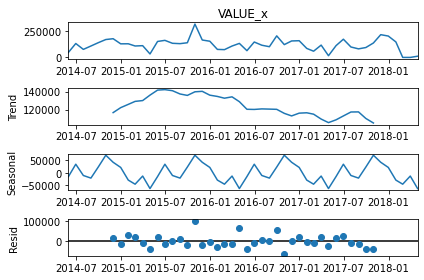

In [32]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show()

# Double exponential smoothing

C:\Users\aalme\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\aalme\AppData\Local\Temp/ipykernel_24248/2450029664.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train).fit(smoothing_level=0.1, smoothing_slope = 0.8)
C:\Users\aalme\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


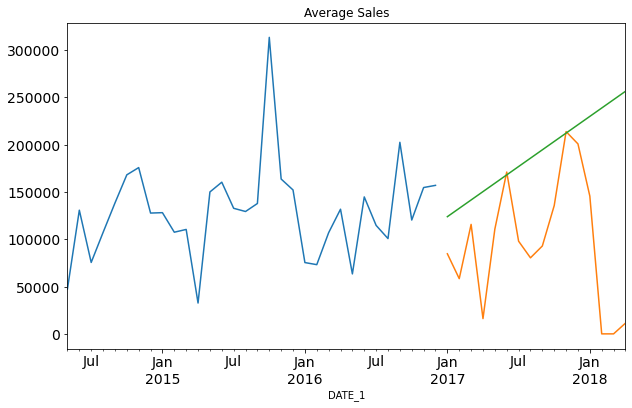

In [33]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#soothing slope = beta
fit1 = Holt(train).fit(smoothing_level=0.1, smoothing_slope = 0.8)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [34]:
fit1.aic

714.0236748952

In [35]:
Holt_df['Holt_linear']

2017-01-31    123830.215372
2017-02-28    132662.536214
2017-03-31    141494.857055
2017-04-30    150327.177897
2017-05-31    159159.498738
2017-06-30    167991.819580
2017-07-31    176824.140421
2017-08-31    185656.461263
2017-09-30    194488.782104
2017-10-31    203321.102946
2017-11-30    212153.423787
2017-12-31    220985.744629
2018-01-31    229818.065470
2018-02-28    238650.386311
2018-03-31    247482.707153
2018-04-30    256315.027994
Freq: M, dtype: float64

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, Holt_df['Holt_linear']))
print(rmse)

124009.00341252821


# Triple exponential smoothing 

C:\Users\aalme\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\aalme\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\aalme\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


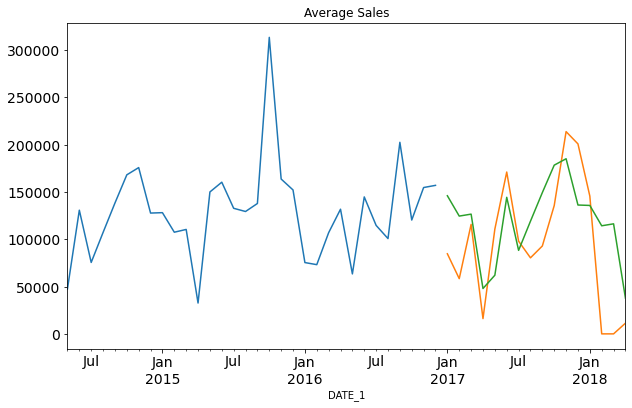

In [37]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#soothing slope = beta
fit1 = ExponentialSmoothing(train,seasonal_periods = 12, trend = 'add', seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [38]:
fit1.aic

716.0899975658344

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rmse)

56621.143643414536


In [40]:
Holt_Winter_df['Holt_Winter']

2017-01-31    145964.736477
2017-02-28    124461.614891
2017-03-31    126527.150678
2017-04-30     47918.360903
2017-05-31     61970.060902
2017-06-30    144308.559492
2017-07-31     88246.251545
2017-08-31    119058.581953
2017-09-30    149295.575195
2017-10-31    178256.743370
2017-11-30    185054.628727
2017-12-31    136154.994988
2018-01-31    135714.948287
2018-02-28    114211.826702
2018-03-31    116277.362488
2018-04-30     37668.572713
Freq: M, dtype: float64

C:\Users\aalme\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\aalme\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\aalme\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


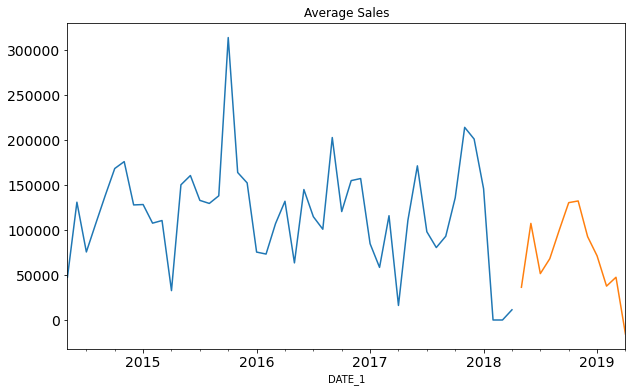

In [41]:
from statsmodels.tsa.api import ExponentialSmoothing


fit1 = ExponentialSmoothing(y,seasonal_periods = 12, trend = 'add', seasonal='add').fit()
Y_predictions = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)

Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14) 
plt.show()

In [42]:
Y_predictions

2018-05-31     36305.042552
2018-06-30    107169.925226
2018-07-31     51460.950167
2018-08-31     68006.822680
2018-09-30     99686.280158
2018-10-31    130177.073477
2018-11-30    132061.089810
2018-12-31     92475.974745
2019-01-31     71163.594385
2019-02-28     37585.780648
2019-03-31     47426.827672
2019-04-30    -15614.164643
Freq: M, dtype: float64

# ARIMA MODEL

In [43]:
import pmdarima as pm

In [76]:
company =company_state[['DATE_1','VALUE_x']]

In [77]:
company.dtypes

DATE_1     datetime64[ns]
VALUE_x           float64
dtype: object

In [78]:
company = company.groupby('DATE_1')["VALUE_x"].sum().reset_index()
company.shape

(46, 2)

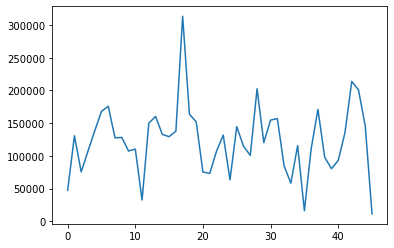

In [79]:
plt.plot(company["VALUE_x"])

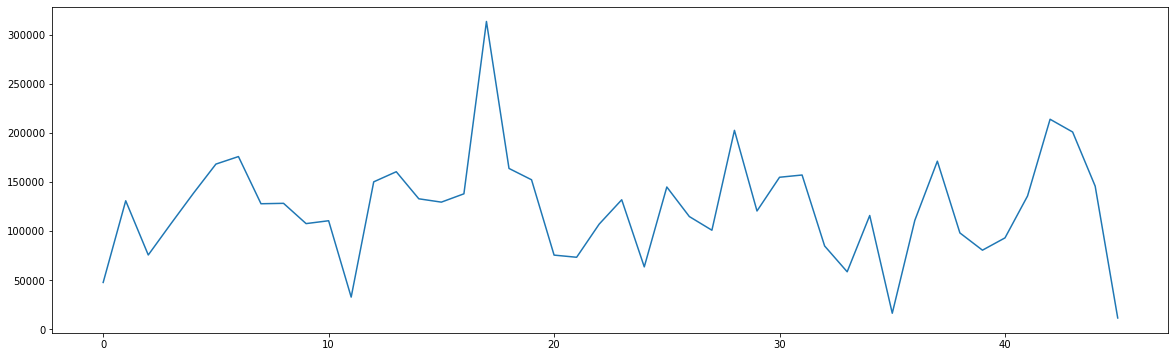

In [80]:
company["VALUE_x"].plot(figsize=(20,6))
plt.show()

In [81]:
company

,DATE_1,VALUE_x
0,2014-05-01,47482.740
1,2014-06-01,130684.185
2,2014-07-01,75471.075
3,2014-08-01,107146.530
4,2014-09-01,138232.710
5,2014-10-01,168045.030
6,2014-11-01,175710.870
7,2014-12-01,127656.945
8,2015-01-01,128078.820
9,2015-02-01,107427.060


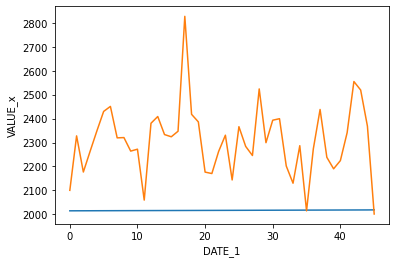

In [83]:
#plot
plt.xlabel("DATE_1")
plt.ylabel("VALUE_x")
plt.plot(company)

In [84]:
#graph is not stationary

In [85]:
#determining rolling statistics
rolmean=company.rolling(window=12).mean()
rolstd=company.rolling(window=12).std()
print(rolmean,rolstd)

         VALUE_x
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11  112404.71250
12  120945.18375
13  123410.31750
14  128178.86625
15  130025.13750
16  129986.92125
17  142093.29375
18  141085.73250
19  143120.32875
20  138725.58375
21  135868.30875
22  135581.62500
23  143843.53500
24  136626.22125
25  135330.12000
26  133822.18125
27  131437.64250
28  136824.54750
29  120738.33000
30  119989.65375
31  120394.19250
32  121168.54125
33  119936.40750
34  120668.61375
35  111036.17250
36  114983.20125
37  117175.28625
38  115786.66500
39  114092.48250
40  104964.81750
41  106237.63125
42  111160.56375
43  114811.14375
44  119890.15875
45  115969.73625          VALUE_x
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           N

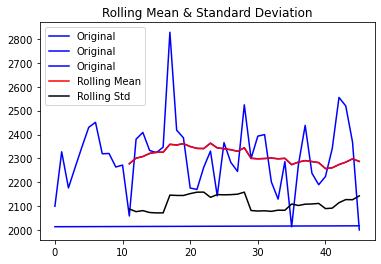

In [89]:
#plotting rolling statistics
orig=plt.plot(company,color='blue',label="Original")
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation")
plt.show(block=False)

In [96]:
#ADFULLER test
from statsmodels.tsa.stattools import adfuller
print("ADfuller test")
dftest = adfuller(company["VALUE_x"],autolag ='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

ADfuller test
Test Statistic                 -5.144904
p-value                         0.000011
#lags used                      0.000000
number of observations used    45.000000
critical value (1%)            -3.584829
critical value (5%)            -2.928299
critical value (10%)           -2.602344
dtype: float64


In [ ]:
# we reject null hypothesis : It is Stationary

In [ ]:
#ravi plz proceed from here..

<AxesSubplot:>

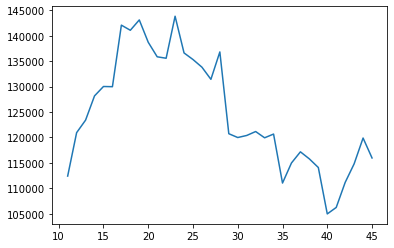

In [88]:
#Rolling Statistics in MA
company['#MA12'] = company['VALUE_x'].rolling(window = 12).mean()
company['#MA12'].dropna().plot()
#company["#MA12"].dropna().plot(figsize =(20,10))
#company.dropna().plot(figsize =(20,10))

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd


In [52]:
#multiplicative Decomposition
mul_value = seasonal_decompose(company["VALUE_x"], model ='multiplicative', period = 12)
    
# Additive Decomposition
add_value = seasonal_decompose(company["VALUE_x"], model ='additive', period = 12)

Text(0.5, 0.98, '\nAdditive Decompose')

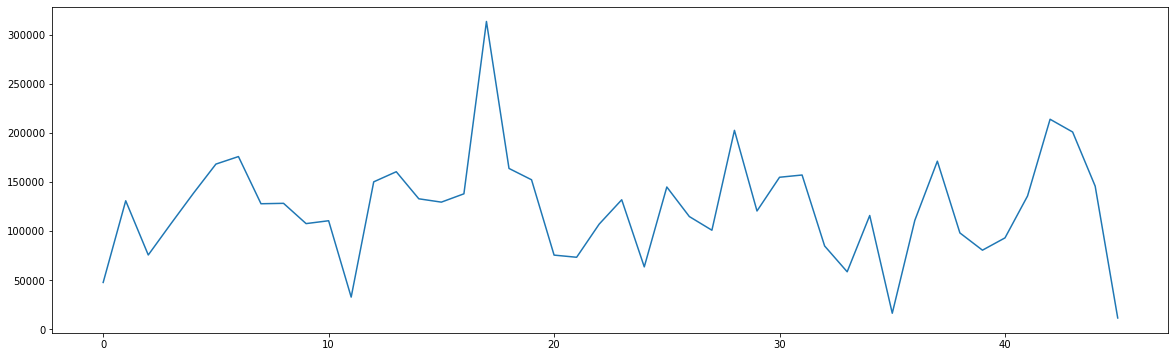

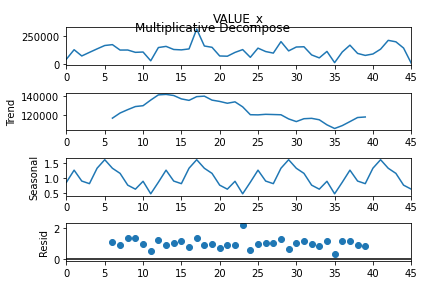

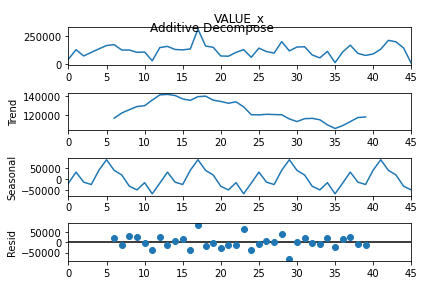

In [53]:
#plot
company["VALUE_x"].plot(figsize=(20,6))
mul_value.plot().suptitle('\nMultiplicative Decompose', fontsize = 12)
add_value.plot().suptitle('\nAdditive Decompose', fontsize = 12)

In [54]:
#Additive data frame
new_df_add = pd.concat([add_value.seasonal,add_value.trend,add_value.resid,add_value.observed],axis=1)
new_df_add.columns = ["Seasonality","Trend","residual","Actual_values"]
new_df_add

,Seasonality,Trend,residual,Actual_values
0,-17681.820078,NaN,NaN,47482.740
1,31422.764922,NaN,NaN,130684.185
2,-13424.945703,NaN,NaN,75471.075
3,-23959.996953,NaN,NaN,107146.530
4,39932.853672,NaN,NaN,138232.710
5,86872.755859,NaN,NaN,168045.030
6,39200.218047,116674.948125,19835.703828,175710.870
7,18657.862422,122177.750625,-13178.668047,127656.945
8,-31747.936953,125794.591875,34032.165078,128078.820
9,-48065.790078,129102.001875,26390.848203,107427.060


In [55]:
#Multiplicative data frame
new_df_mul = pd.concat([mul_value.seasonal,mul_value.trend,mul_value.resid,mul_value.observed],axis=1)
new_df_mul.columns = ["Seasonality","Trend","residual","Actual_values"]
new_df_mul

,Seasonality,Trend,residual,Actual_values
0,0.856889,NaN,NaN,47482.740
1,1.265298,NaN,NaN,130684.185
2,0.896617,NaN,NaN,75471.075
3,0.808901,NaN,NaN,107146.530
4,1.331452,NaN,NaN,138232.710
5,1.619308,NaN,NaN,168045.030
6,1.329672,116674.948125,1.132600,175710.870
7,1.156600,122177.750625,0.903377,127656.945
8,0.758300,125794.591875,1.342686,128078.820
9,0.622297,129102.001875,1.337158,107427.060


In [56]:
#Adfuller test p values should be less than 5%
adfuller_result = adfuller(company['VALUE_x'], autolag='AIC')
print(f'ADF Statsistic:{adfuller_result[0]}')
      
print(f'p-value:{adfuller_result[1]}')

ADF Statsistic:-5.1449035083182775
p-value:1.1379205022190718e-05


<AxesSubplot:>

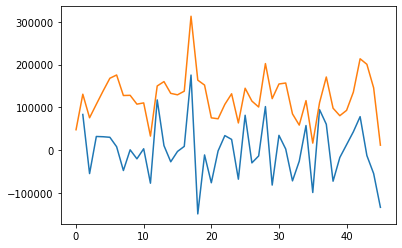

In [57]:
#Differencing Method
company["value_diff"]=company["VALUE_x"] - company["VALUE_x"].shift(1)
company["value_diff"].dropna().plot()
company["VALUE_x"].dropna().plot()

<AxesSubplot:>

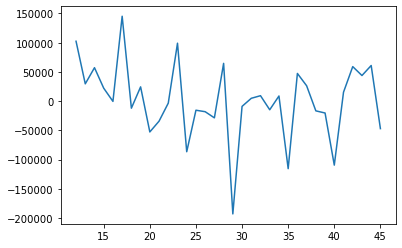

In [59]:
#Seasonal  Method
company["value_Seasonal"]=company["VALUE_x"] - company["VALUE_x"].shift(12)
company["value_Seasonal"].dropna().plot()
#company["VALUE_x"](figsize =(20,10))

In [60]:
company["adjlog_val"] = np.log(company["VALUE_x"].replace(0, np.nan))

<AxesSubplot:>

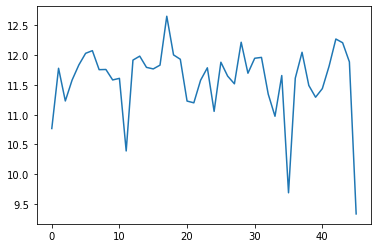

In [61]:
#Transformation

company["adjlog_val"].dropna().plot()
#company.dropna().plot(figsize =(20,10))

<AxesSubplot:>

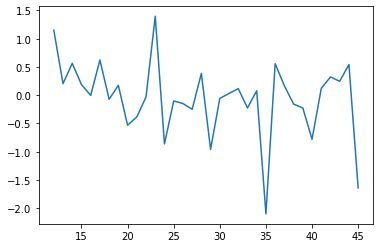

In [62]:
company["adjlog_val_diff"]=company["adjlog_val"] - company["adjlog_val"].shift(12)
company["adjlog_val_diff"].dropna().plot()
#company.dropna().plot(figsize =(20,10))

In [63]:
company

,DATE_1,VALUE_x,value_diff,value_Seasonal,adjlog_val,adjlog_val_diff
0,2014-05-01,47482.740,NaN,NaN,10.768122,NaN
1,2014-06-01,130684.185,83201.445,NaN,11.780539,NaN
2,2014-07-01,75471.075,-55213.110,NaN,11.231505,NaN
3,2014-08-01,107146.530,31675.455,NaN,11.581953,NaN
4,2014-09-01,138232.710,31086.180,NaN,11.836694,NaN
5,2014-10-01,168045.030,29812.320,NaN,12.031987,NaN
6,2014-11-01,175710.870,7665.840,NaN,12.076595,NaN
7,2014-12-01,127656.945,-48053.925,NaN,11.757102,NaN
8,2015-01-01,128078.820,421.875,NaN,11.760401,NaN
9,2015-02-01,107427.060,-20651.760,NaN,11.584567,NaN


<AxesSubplot:>

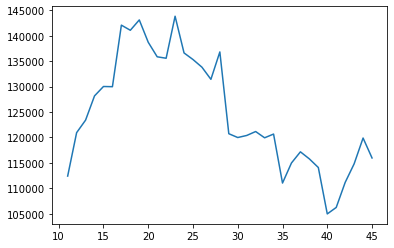

In [64]:
#Rolling Statistics in MA
company['#MA12'] = company['VALUE_x'].rolling(window = 12).mean()
company['#MA12'].dropna().plot()
#company["#MA12"].dropna().plot(figsize =(20,10))
#company.dropna().plot(figsize =(20,10))

<AxesSubplot:>

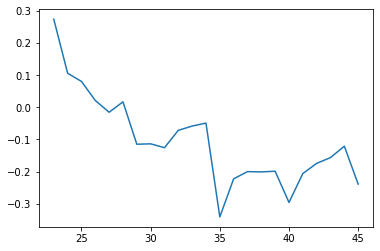

In [65]:
#Rolling Statistics in log
company['#MA_log_12'] = company['adjlog_val_diff'].rolling(window = 12).mean()
company['#MA_log_12'].dropna().plot()
#company["#MA_log_12"].dropna().plot(figsize =(20,10))

In [66]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1192.941, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1189.942, Time=0.04 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1190.462, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1269.736, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1188.758, Time=0.01 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1190.077, Time=0.02 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1191.893, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1190.587, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1190.737, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1189.284, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=1201.525, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 0.265 seconds


In [67]:
model.aic()

1188.7583199380151

In [68]:
model

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(y,order=(1,0,0),seasonal_order =(0,0,0,12)).fit()

C:\Users\aalme\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


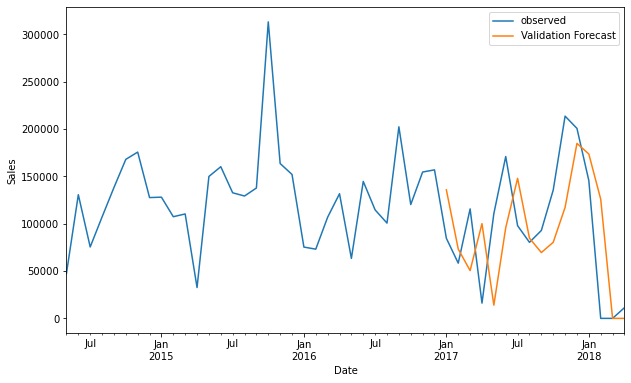

In [70]:
pred = model.get_prediction(start=pd.to_datetime('2017-01-31'))
#pred = model.get_forecast(steps=12)
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [71]:
pred.predicted_mean

DATE_1
2017-01-31    1.357865e+05
2017-02-28    7.323276e+04
2017-03-31    5.049309e+04
2017-04-30    1.001044e+05
2017-05-31    1.395819e+04
2017-06-30    9.580888e+04
2017-07-31    1.479793e+05
2017-08-31    8.474183e+04
2017-09-30    6.953198e+04
2017-10-31    8.037218e+04
2017-11-30    1.172989e+05
2017-12-31    1.849215e+05
2018-01-31    1.736921e+05
2018-02-28    1.259704e+05
2018-03-31    4.997045e-12
2018-04-30    6.776622e-29
Freq: M, Name: predicted_mean, dtype: float64

In [72]:
Y_pred = pred.predicted_mean
Y_test = y['2017-01-01':]
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

62051.831451704835


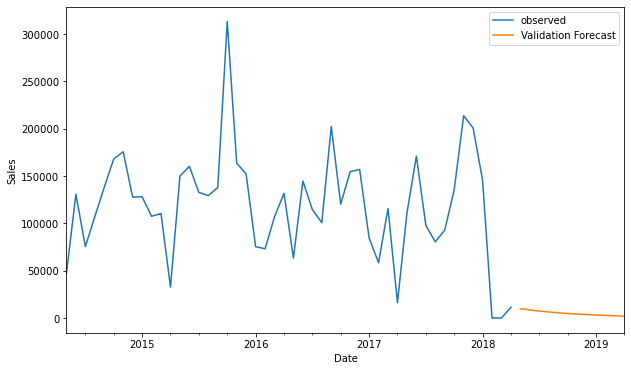

In [73]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31'))
pred = model.get_forecast(steps=12)
plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [74]:
pred.predicted_mean

2018-05-31    9785.604344
2018-06-30    8467.356323
2018-07-31    7326.693435
2018-08-31    6339.692655
2018-09-30    5485.653701
2018-10-31    4746.664888
2018-11-30    4107.227468
2018-12-31    3553.930575
2019-01-31    3075.169961
2019-02-28    2660.904620
2019-03-31    2302.446202
2019-04-30    1992.276790
Freq: M, Name: predicted_mean, dtype: float64